![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de popularidad en canción

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de popularidad en canción".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad-2025-12-prediccion-popularidad-en-cancion).

## Datos para la predicción de popularidad en cancion

En este proyecto se usará el conjunto de datos de datos de popularidad en canciones, donde cada observación representa una canción y se tienen variables como: duración de la canción, acusticidad y tempo, entre otras. El objetivo es predecir qué tan popular es la canción. Para más detalles puede visitar el siguiente enlace: [datos](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importación librerías
import pandas as pd
import numpy as np

In [4]:
# Carga de datos de archivo .csv
df_train = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)

In [11]:
print(df_train.shape)
df_train.head()


(79800, 21)


,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,0,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,22
1,1,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,22
2,2,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,37
3,3,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,4,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,27


In [12]:
df_train.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'popularity'],
      dtype='object')

In [13]:
df_train[['track_id', 'artists', 'album_name', 'track_name', 'track_genre']].nunique()
df=df_train

🔍 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        79800 non-null  int64  
 1   track_id          79800 non-null  object 
 2   artists           79800 non-null  object 
 3   album_name        79800 non-null  object 
 4   track_name        79800 non-null  object 
 5   duration_ms       79800 non-null  int64  
 6   explicit          79800 non-null  bool   
 7   danceability      79800 non-null  float64
 8   energy            79800 non-null  float64
 9   key               79800 non-null  int64  
 10  loudness          79800 non-null  float64
 11  mode              79800 non-null  int64  
 12  speechiness       79800 non-null  float64
 13  acousticness      79800 non-null  float64
 14  instrumentalness  79800 non-null  float64
 15  liveness          79800 non-null  float64
 16  valen

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79800.0,39899.500000,23036.420078,0.000000,19949.75000,39899.500000,59849.2500,79799.000
duration_ms,79800.0,227902.192506,105059.883967,13386.000000,174436.00000,212813.000000,261426.0000,5237295.000
danceability,79800.0,0.567318,0.173110,0.000000,0.45600,0.581000,0.6950,0.985
energy,79800.0,0.641529,0.251441,0.000019,0.47200,0.685000,0.8540,1.000
key,79800.0,5.307043,3.562186,0.000000,2.00000,5.000000,8.0000,11.000
loudness,79800.0,-8.263741,5.035504,-49.307000,-10.00600,-7.012000,-5.0000,4.532
mode,79800.0,0.637732,0.480659,0.000000,0.00000,1.000000,1.0000,1.000
speechiness,79800.0,0.084750,0.105657,0.000000,0.03590,0.049000,0.0845,0.965
acousticness,79800.0,0.314979,0.332512,0.000000,0.01700,0.169000,0.5980,0.996
instrumentalness,79800.0,0.157319,0.310792,0.000000,0.00000,0.000041,0.0505,1.000


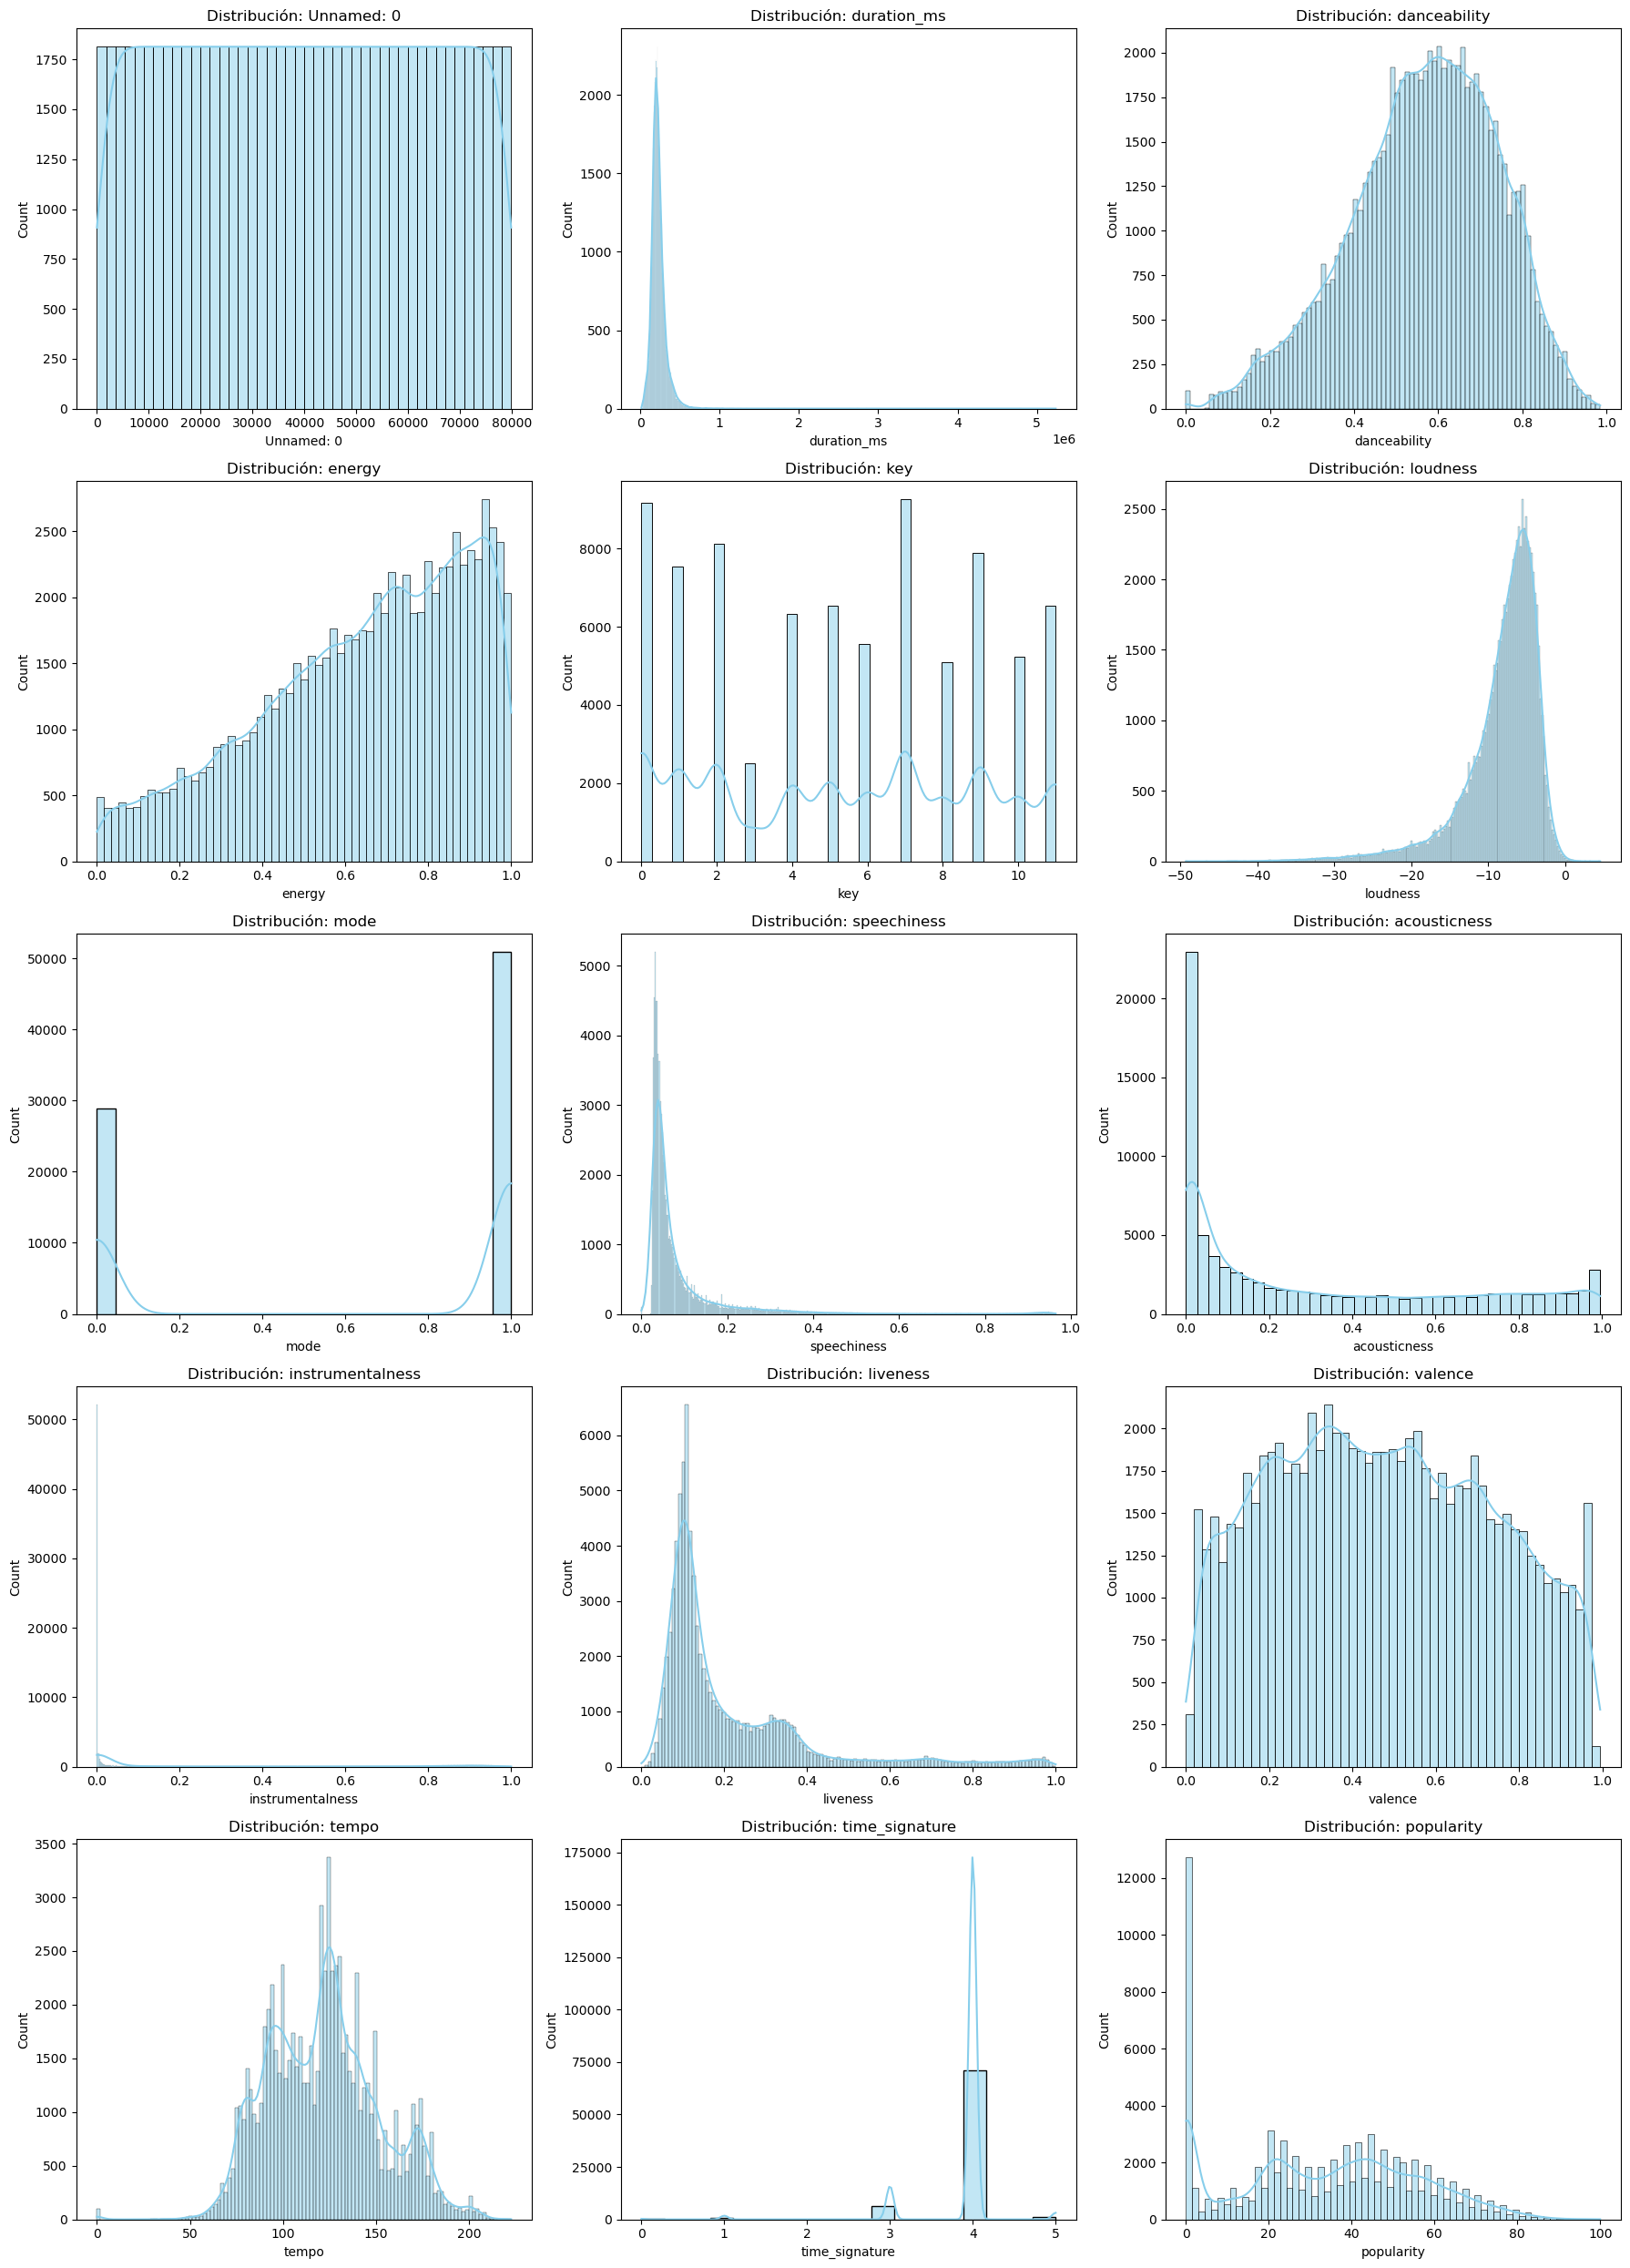


🎶 Distribución de valores únicos en: track_id
track_id
5ftfVzSLIi5ZxYdNbRtf41    7
0WaaPFt4Qy8sVfxKz43bCD    6
434VcYrm3FPRRiW4jw5nLb    6
6bzWr3EpSEolVwlbLk58il    6
1uOe9m9bAiAY4kGnGDu1Ns    6
7uhINGViZPygI2AljxO8KN    6
3dAiWRwZXd8pEOhItkkZXb    6
4sO9tnvCH3DJZ3AAXoixjd    6
0P9Kg7MUJ8ygcKSOPh1LfJ    6
09IStsImFySgyp0pIQdqAc    6
Name: count, dtype: int64

🎶 Distribución de valores únicos en: artists
artists
The Beatles        194
George Jones       185
Stevie Wonder      174
Linkin Park        154
Prateek Kuhad      154
Feid               143
Ella Fitzgerald    139
Chuck Berry        139
OneRepublic        134
Håkan Hellström    127
Name: count, dtype: int64

🎶 Distribución de valores únicos en: album_name
album_name
Alternative Christmas 2022     131
Feliz Cumpleaños con Perreo    124
Metal                           97
Halloween con perreito          91
Halloween Party 2022            89
The Complete Hank Williams      76
Fiesta portatil                 76
Queda poco para la PAES

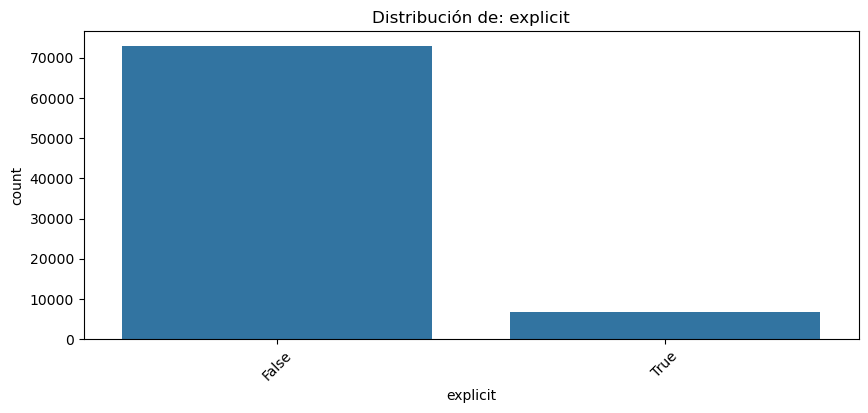


🎶 Distribución de valores únicos en: track_genre
track_genre
progressive-house    738
sad                  737
world-music          729
singer-songwriter    727
swedish              726
ambient              725
anime                723
soul                 722
trance               721
salsa                721
Name: count, dtype: int64


In [16]:
# 3. Tipos de variable y valores nulos
# ================================
print("🔍 Información general del dataset:")
print(df.info())
print("\n📉 Valores nulos por columna:")
print(df.isnull().sum())

# ================================
# 4. División de columnas
# ================================
id_cols = ['Unnamed: 0', 'track_id', 'album_name', 'track_name', 'artists']
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

print("\n📌 Columnas numéricas:", num_cols)
print("📌 Columnas categóricas:", cat_cols)

# ================================
# 5. Estadísticas descriptivas
# ================================
print("\n📊 Resumen estadístico de variables numéricas:")
display(df[num_cols].describe().T)

# ================================
# 6. Gráficos de distribución numéricas
# ================================
import math
n = len(num_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución: {col}', fontsize=12)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ================================
# 7. Gráficos de categóricas (solo si hay pocas categorías)
# ================================
for col in cat_cols:
    print(f"\n🎶 Distribución de valores únicos en: {col}")
    print(df[col].value_counts().head(10))
    if df[col].nunique() <= 30:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
        plt.xticks(rotation=45)
        plt.title(f'Distribución de: {col}')
        plt.show()

Preprocesamiento y seleccion de variables.

In [17]:
# 🔧 1. Limpieza y copia inicial
# ===============================
df_model = df.copy()
df_model.drop(columns=["Unnamed: 0", "track_id"], inplace=True)

# ===============================
# 2. Variables derivadas
# ===============================

# A. Longitud del nombre de la canción (en caracteres y palabras)
df_model['track_name_length'] = df_model['track_name'].apply(lambda x: len(str(x)))
df_model['track_name_word_count'] = df_model['track_name'].apply(lambda x: len(str(x).split()))

# B. Popularidad promedio del álbum
album_popularity = df_model.groupby('album_name')['popularity'].mean()
df_model['album_avg_popularity'] = df_model['album_name'].map(album_popularity)

# C. Popularidad promedio del primer artista
df_model['main_artist'] = df_model['artists'].apply(lambda x: str(x).split(";")[0])
artist_popularity = df_model.groupby('main_artist')['popularity'].mean()
df_model['artist_avg_popularity'] = df_model['main_artist'].map(artist_popularity)

# ===============================
#  3. Eliminación de columnas textuales
# ===============================
df_model.drop(columns=["track_name", "album_name", "artists", "main_artist"], inplace=True)

# ===============================
#  4. Conversión booleana a entero
# ===============================
df_model['explicit'] = df_model['explicit'].astype(int)

# ===============================
#  5. One-hot encoding para track_genre
# ===============================
df_model = pd.get_dummies(df_model, columns=["track_genre"], drop_first=True)

# ===============================
#  6. División en X e y

X = df_model.drop(columns=["popularity"])
y = df_model["popularity"]

# ✅ Verificación final
print(f"🧾 Dimensiones del conjunto final para modelar: X = {X.shape}, y = {y.shape}")
print("✅ Dataset 'df_model' listo para entrenamiento.")

🧾 Dimensiones del conjunto final para modelar: X = (79800, 131), y = (79800,)
✅ Dataset 'df_model' listo para entrenamiento.


**Modelacion**

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [20]:
# Asegúrate de tener df_model listo antes de correr esto:
X = df_model.drop(columns=["popularity"])
y = df_model["popularity"]

In [21]:
# 2. División entrenamiento / validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [24]:
# Modelos y parámetros a ajustar
# ==========================
modelos_param = {
    "Decision Tree": (DecisionTreeRegressor(random_state=42), {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10]
    }),
    "Random Forest": (RandomForestRegressor(random_state=42), {
        'n_estimators': [50, 100],
        'max_depth': [10, 20, None],
        'max_features': ['auto', 'sqrt']
    }),
    "Gradient Boosting": (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [100],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }),
    "XGBoost": (XGBRegressor(random_state=42, verbosity=0), {
        'n_estimators': [100],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0]
    }),
}


# Entrenamiento con GridSearchCV

resultados = []
mejores_modelos = {}

for nombre, (modelo, param_grid) in modelos_param.items():
    print(f" Entrenando y calibrando: {nombre}")
    grid = GridSearchCV(modelo, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    
    best_model = grid.best_estimator_
    mejores_modelos[nombre] = best_model
    
    pred = best_model.predict(X_val_scaled)
    resultados.append({
        "Modelo": nombre,
        "Mejor params": grid.best_params_,
        "RMSE": np.sqrt(mean_squared_error(y_val, pred)),
        "MAE": mean_absolute_error(y_val, pred),
        "R²": r2_score(y_val, pred)
    })

🔍 Entrenando y calibrando: Decision Tree
🔍 Entrenando y calibrando: Random Forest
🔍 Entrenando y calibrando: Gradient Boosting
🔍 Entrenando y calibrando: XGBoost


In [26]:
# ==========================
# Ensambles
# ==========================
# Bagging con mejor modelo base
bagging = BaggingRegressor(estimator=mejores_modelos["Decision Tree"], n_estimators=10, random_state=42)
bagging.fit(X_train_scaled, y_train)
bagging_pred = bagging.predict(X_val_scaled)

resultados.append({
    "Modelo": "Bagging (DT)",
    "Mejor params": "n_estimators=10",
    "RMSE": np.sqrt(mean_squared_error(y_val, bagging_pred)),
    "MAE": mean_absolute_error(y_val, bagging_pred),
    "R²": r2_score(y_val, bagging_pred)
})

# Stacking con modelos calibrados
stacking = StackingRegressor(
    estimators=[
        ('rf', mejores_modelos["Random Forest"]),
        ('gb', mejores_modelos["Gradient Boosting"])
    ],
    final_estimator=Ridge(alpha=1.0),
    passthrough=True,
    n_jobs=-1
)
stacking.fit(X_train_scaled, y_train)
stack_pred = stacking.predict(X_val_scaled)

resultados.append({
    "Modelo": "Stacking (RF + GB)",
    "Mejor params": "Final: Ridge",
    "RMSE": np.sqrt(mean_squared_error(y_val, stack_pred)),
    "MAE": mean_absolute_error(y_val, stack_pred),
    "R²": r2_score(y_val, stack_pred)
})

# ==========================
# Resultados finales
# ==========================
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='RMSE')



ModuleNotFoundError: No module named 'ace_tools'

In [27]:
print(df_resultados)

               Modelo                                       Mejor params  \
5  Stacking (RF + GB)                                       Final: Ridge   
3             XGBoost  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
2   Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
4        Bagging (DT)                                    n_estimators=10   
1       Random Forest  {'max_depth': None, 'max_features': 'sqrt', 'n...   
0       Decision Tree         {'max_depth': 10, 'min_samples_split': 10}   

       RMSE       MAE        R²  
5  4.173545  2.173192  0.964769  
3  4.228225  2.088409  0.963840  
2  4.251238  2.091465  0.963446  
4  4.301052  2.039076  0.962584  
1  4.585035  2.707360  0.957480  
0  4.617039  2.162064  0.956884  


In [28]:
# Visualización datos de entrenamiento
dataTraining.head()

,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,0,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,22
1,1,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,22
2,2,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,37
3,3,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,4,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,27


In [29]:
# Visualización datos de test
dataTesting.head()

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,world-music
1,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,grindcore
2,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",213578,False,0.173,0.803,9,-10.071,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,iranian
3,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,151387,False,0.683,0.511,6,-5.598,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,rock
4,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,236293,False,0.555,0.941,9,-3.294,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,j-idol


In [38]:
dataTesting=df_test.copy()

In [39]:
# 2. Variables derivadas (track name)
dataTesting['track_name_length'] = dataTesting['track_name'].apply(lambda x: len(str(x)))
dataTesting['track_name_word_count'] = dataTesting['track_name'].apply(lambda x: len(str(x).split()))

# 3. Variables derivadas desde df (el original con album y artists)
album_avg_popularity = df.groupby('album_name')['popularity'].mean()
dataTesting['album_avg_popularity'] = dataTesting['album_name'].map(album_avg_popularity)

dataTesting['main_artist'] = dataTesting['artists'].apply(lambda x: str(x).split(";")[0])
artist_avg_popularity = df.assign(main_artist=df['artists'].apply(lambda x: str(x).split(";")[0])) \
                          .groupby('main_artist')['popularity'].mean()
dataTesting['artist_avg_popularity'] = dataTesting['main_artist'].map(artist_avg_popularity)

# 4. Limpieza
dataTesting['explicit'] = dataTesting['explicit'].astype(int)
dataTesting.drop(columns=["track_id", "track_name", "album_name", "artists", "main_artist"], inplace=True)

# 5. One-hot encoding de género
dataTesting = pd.get_dummies(dataTesting, columns=["track_genre"], drop_first=True)
dataTesting = dataTesting.reindex(columns=X.columns, fill_value=0)

# ✅ Imputar valores faltantes
dataTesting.fillna(X.mean(), inplace=True)



# 6. Escalado
X_test_scaled = scaler.transform(dataTesting)

 

In [40]:
# 7. Predicción con el modelo final
y_pred = stacking.predict(X_test_scaled)

# 8. Exportación Kaggle
submission_df = pd.DataFrame(y_pred, index=dataTesting.index, columns=['Popularity'])
submission_df.to_csv("test_submission_file.csv", index_label="ID")

# 9. Ver primeras predicciones
submission_df.head()

,Popularity
0,46.518948
1,14.400230
2,-0.153575
3,0.195032
4,30.908299


In [ ]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 100, index=dataTesting.index, columns=['Popularity'])

In [ ]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission_file.csv', index_label='ID')
y_pred.head()